# NCI60 Clustering/PCA Lab  
  
  ##### From Introduction to Statistical Learning

Here we illustrate hierarchical clustering and PCA techniques on the `NCI60` cancer cell line microarray data, which consists of 6,830 gene expression measurements on 64 cancer cell lines.

In [1]:
library(ISLR)
nci.labs <- NCI60$labs
nci.data <- NCI60$data

Each cell line is labeled with a cancer type. We do not make use of the cancer types in performing PCA and clustering, since these are unsupervised techniques, but after performing PCA and clustering, we'll check to see the extent to which these cancer types agree with tthe results of these unsupervised techniques.  

In [2]:
dim(nci.data)

[1]   64 6830

First we examine the cancer types for teh cell lines:

In [3]:
head(nci.labs)

[1] "CNS"    "CNS"    "CNS"    "RENAL"  "BREAST" "CNS"

In [4]:
table(nci.labs)

nci.labs
     BREAST         CNS       COLON K562A-repro K562B-repro    LEUKEMIA 
          7           5           7           1           1           6 
MCF7A-repro MCF7D-repro    MELANOMA       NSCLC     OVARIAN    PROSTATE 
          1           1           8           9           6           2 
      RENAL     UNKNOWN 
          9           1 

We see above that there are in fact 14 distinct groups in the data.

#  
  
  

Now we perform PCA on the data after scaling the variables (the genes) to have standard deviation one, although one could argue that it is better to not scale the genes.

In [5]:
pr.out <- prcomp(nci.data, scale=TRUE)

We now plot the first few principal component score vectors, in order to visualize the data. The observations (cell lines) corresponding to a given cancer type will be plotted in the same color, so that we can see to what extent the observations within a cancer type are similar to each other. We first create a simple function that assigns a distinct color to each element of a numeric vector. The function will be used to assign a color to each of the 64 cell lines, based on the cancer type to which it corresponds.

In [6]:
Cols <- function(vec) {
    cols <- rainbow(length(unique(vec)))
    return(cols[as.numeric(as.factor(vec))])
}

Note here that the `rainbow()` function takes as its argument a positive integer, and returns a vector containing that number of distinct colors. We now can plot the principal component score vectors.

In [7]:
as.numeric(as.factor(nci.labs))

[1]  2  2  2 13  1  2  2  1 10 10 13 13 13 13 13 13 13  1 10 13 14 11  9 12 11
[26] 11 11 11 11 12 10 10 10  6  5  4  6  6  6  6  6  3  3  3  3  3  3  3  7  1
[51]  8  1 10 10 10  9  1  1  9  9  9  9  9  9

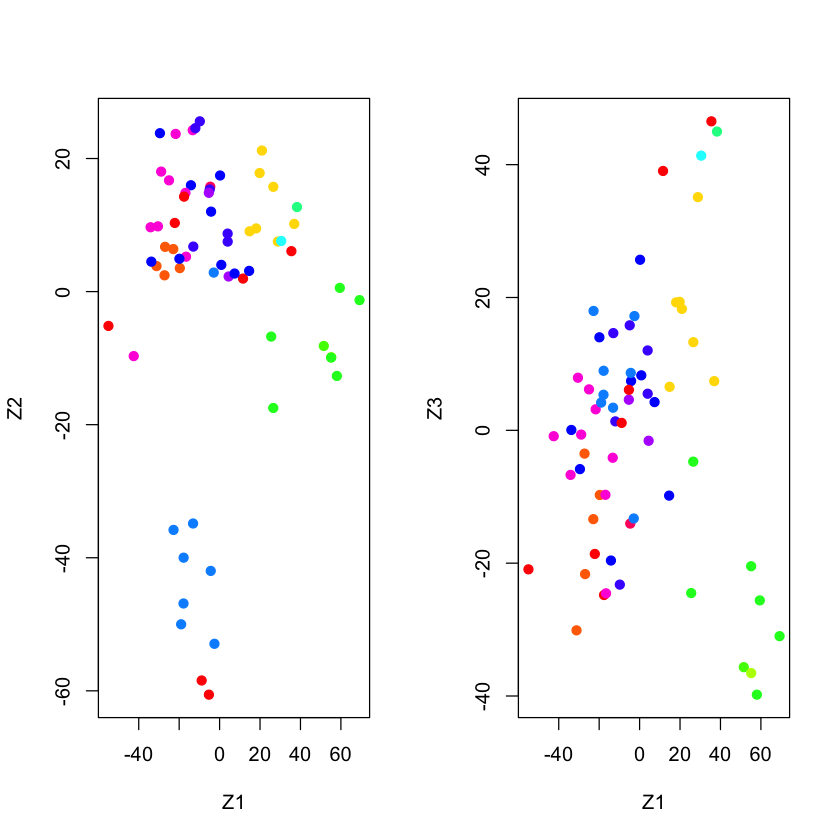

In [8]:
par(mfrow=c(1,2))
plot(pr.out$x[,1:2], col=Cols(nci.labs), pch=19, xlab='Z1', ylab='Z2')
plot(pr.out$x[,c(1,3)], col=Cols(nci.labs), pch=19, xlab='Z1', ylab='Z3')

On the whole, cell lines corresponding to a single cancer type do tend to have similar values on the first few principal component score vectors. This indicates that the cell lines from the same cancer type tend to have pretty similar gene expression levels.

We can obtain a summary of the proportion of variance explained (PVE) of the principal components using the `summary()` method for a `prcomp` object:

In [9]:
summary(pr.out)

Importance of components:
                           PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     27.8535 21.48136 19.82046 17.03256 15.97181 15.72108
Proportion of Variance  0.1136  0.06756  0.05752  0.04248  0.03735  0.03619
Cumulative Proportion   0.1136  0.18115  0.23867  0.28115  0.31850  0.35468
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     14.47145 13.54427 13.14400 12.73860 12.68672 12.15769
Proportion of Variance  0.03066  0.02686  0.02529  0.02376  0.02357  0.02164
Cumulative Proportion   0.38534  0.41220  0.43750  0.46126  0.48482  0.50646
                           PC13     PC14     PC15     PC16     PC17     PC18
Standard deviation     11.83019 11.62554 11.43779 11.00051 10.65666 10.48880
Proportion of Variance  0.02049  0.01979  0.01915  0.01772  0.01663  0.01611
Cumulative Proportion   0.52695  0.54674  0.56590  0.58361  0.60024  0.61635
                           PC19    PC20     PC21    PC

Using the `plot()` function, we can also plot the variance explained by the first few principal components:

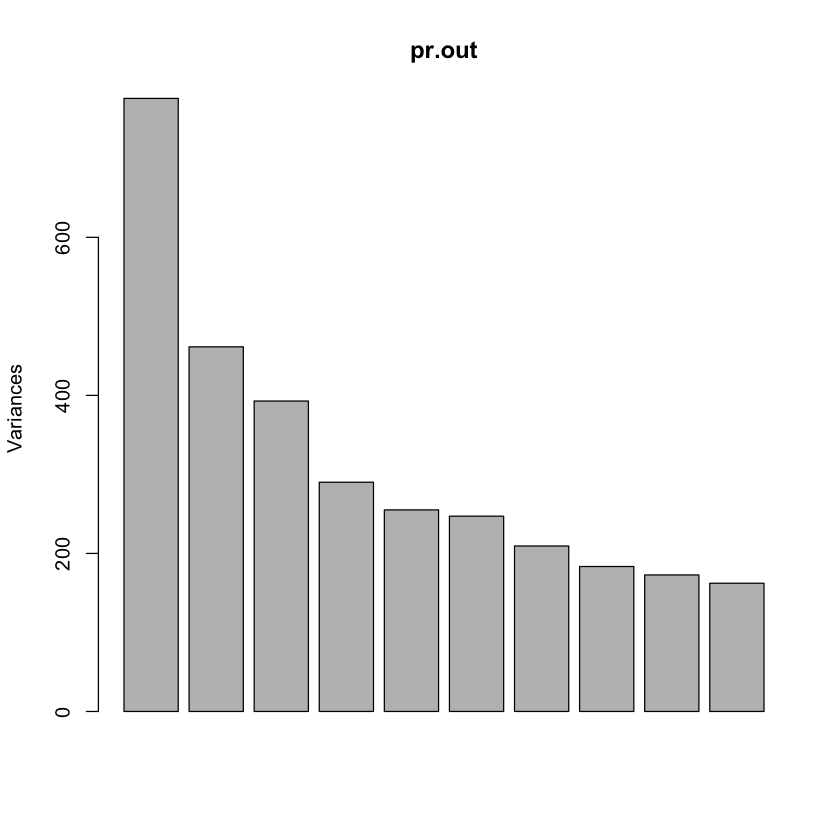

In [10]:
plot(pr.out)

Note that the height of each bar in the plot is given by squaring the corresponding element of `pr.out%sdev`. However, it is more informative to plot the PVE of each principal component (i.e., a scree plot) and the cumulative PVE of each principal component, as below:

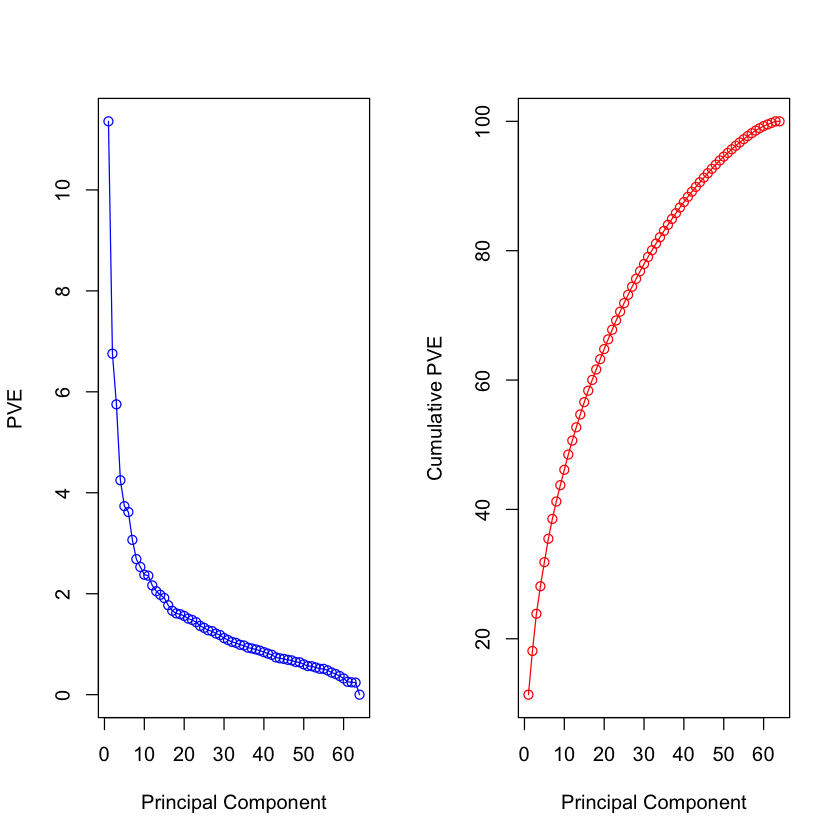

In [11]:
pve <- 100*(pr.out$sdev^2/sum(pr.out$sdev^2))
par(mfrow=c(1, 2))
plot(pve, type='o', ylab='PVE', xlab='Principal Component', col='blue')
plot(cumsum(pve), type='o', ylab='Cumulative PVE', xlab='Principal Component', col='red')

Note that the elements of `pve` can also be computed directly from the summary, `summary(pr.out)$importance[2,]`, and the elements of `cumsum(pve)` are given by `summary(pr.out)$importance[3,]`.

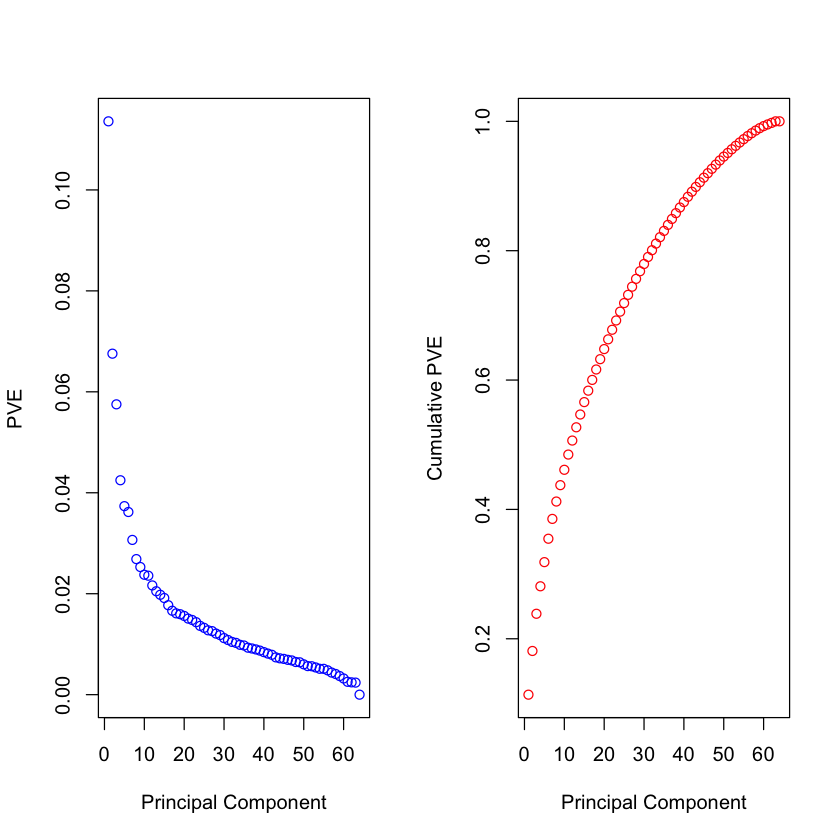

In [12]:
par(mfrow=c(1,2))
plot(summary(pr.out)$importance[2,], xlab='Principal Component', ylab='PVE', col='blue')
plot(summary(pr.out)$importance[3,], xlab='Principal Component', ylab='Cumulative PVE', col='red')

In [13]:
summary(pr.out)$importance

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64
Standard deviation,27.85347,21.48136,19.82046,17.03256,15.97181,15.72108,14.47145,13.54427,13.14400,12.73860,...,5.912333,5.735386,5.47261,5.292148,5.021174,4.683979,4.175673,4.082121,4.041243,1.236942e-14
Proportion of Variance,0.11359,0.06756,0.05752,0.04248,0.03735,0.03619,0.03066,0.02686,0.02529,0.02376,...,0.005120,0.004820,0.00438,0.004100,0.003690,0.003210,0.002550,0.002440,0.002390,0.000000e+00
Cumulative Proportion,0.11359,0.18115,0.23867,0.28115,0.31850,0.35468,0.38534,0.41220,0.43750,0.46126,...,0.972410,0.977230,0.98161,0.985710,0.989400,0.992620,0.995170,0.997610,1.000000,1.000000e+00


We see above that together, the first seven principal components explain around 40% of the variance in the data. This is not a huge amount of the variance. However, looking at the scree plot, we see that while each of the first seven principal components explain a substantial amount variance, there is a marked decrease in the variance explained by further principal components. That is, there is an "elbow" in the plot after approximately the seventh principal component. This suggests that there may be little benefit to examining more than seven or so principal components (though even examining seven principal components is difficult).

#  

## Clustering the Observations  
  
  We now proceed to hierarchically cluster the cell lines in the data, with the goal of finding out whether or not the observations cluster into distinct types of cancer. To begin, we standardize the variables to have mean zero and standard deviationo one. Note: This is optional and should only be performed if we want each gene to be on the same scale.

In [14]:
sd.data <- scale(nci.data)

We now perform hierarchical clustering of the observations using complete, single, and average linkage. Euclidean distance is used as the dissimilarity measure.

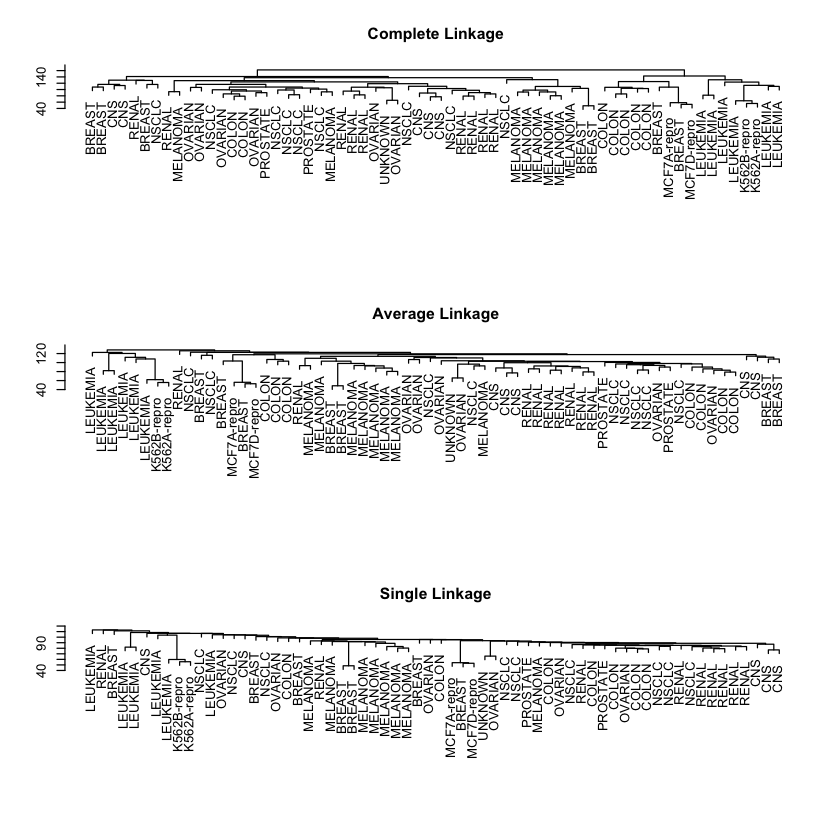

In [16]:
par(mfrow=c(3, 1))
data.dist <- dist(sd.data)
plot(hclust(data.dist, method='complete'), labels=nci.labs, main='Complete Linkage', xlab='', ylab='', sub='')
plot(hclust(data.dist, method='average'), labels=nci.labs, main='Average Linkage', xlab='', ylab='', sub='')
plot(hclust(data.dist, method='single'), labels=nci.labs, main='Single Linkage', xlab='', ylab='', sub='')

We can see that the choice of linkage definitley affects the results obtained. Typically, single linkage will tend to yield *trailing* clusters: very large clusters onto which individual observations attach one-by-one. On the other hand, complete and average linkage tend to yield more balanced clusters. For this reason, complete and average linkage are generally preferred to single linkage. Clearly cell lines within a single cancer type do tend to cluster together, although the clustering isn't perfect. We will use complete linkage hierarchical clustering for the rest of the analysis.  
  
  We can cut the dendrogram at the height that will yield a particular number of clusters, say four:  
  

In [17]:
hc.out <- hclust(dist(sd.data)) # Default for hclust is complete linkage, so no need to use the method= option
hc.clusters <- cutree(hc.out, 4)
table(hc.clusters, nci.labs)

           nci.labs
hc.clusters BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro
          1      2   3     2           0           0        0           0
          2      3   2     0           0           0        0           0
          3      0   0     0           1           1        6           0
          4      2   0     5           0           0        0           1
           nci.labs
hc.clusters MCF7D-repro MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
          1           0        8     8       6        2     8       1
          2           0        0     1       0        0     1       0
          3           0        0     0       0        0     0       0
          4           1        0     0       0        0     0       0

There are some clear patterns. All the lukemia cell lines fall in cluster three, while the breast cancer cell lines are spread out over three different clusters. We can plot the cut on the dendrogram that produces these four clusters as follows:

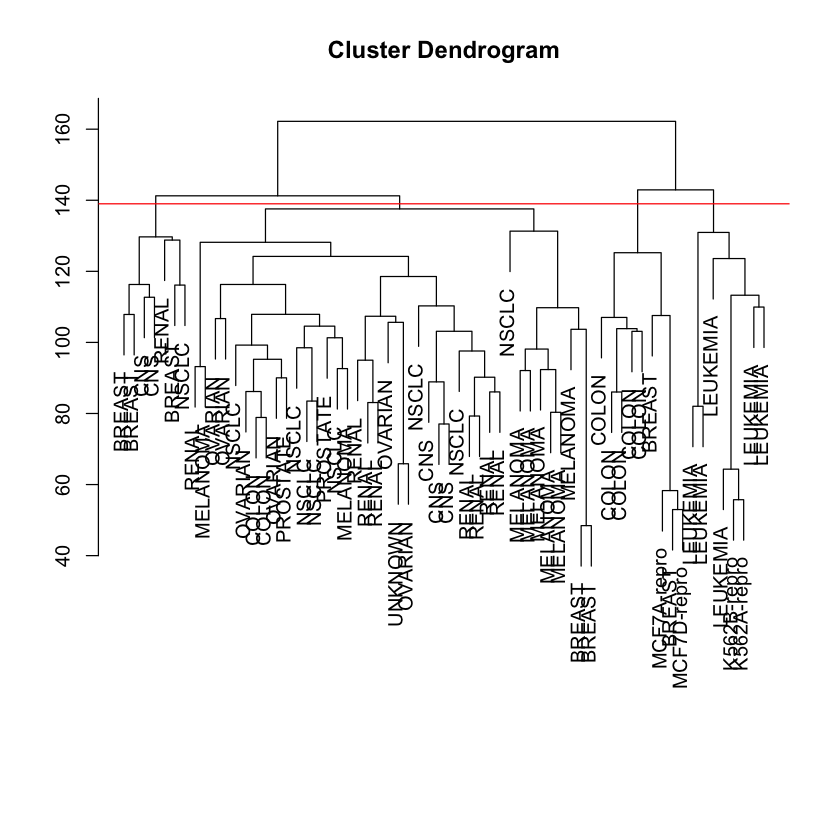

In [19]:
par(mfrow=c(1,1))
plot(hc.out, labels=nci.labs, xlab='', ylab='', sub='')
abline(h=139, col='red')

The `abline()` function draws a straight line on top of any existing plot in `R`. The argument `h=139` plots a horizontal line at height 139 on the dendrogram; this is the height that results in four distinct clusters. It is easy to verify that the resulting clusters are the same as the ones obtained using `cutree(hc.out, 4)`.  
  
  Printing the output of `hclust` gives a useful summary of the object:

In [20]:
hc.out


Call:
hclust(d = dist(sd.data))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 64 


It's worth noting that K-means clustering and hierarchical clusttering with the dendrogram cut to obtain the same number of clusters can yield very different results. How do these `NCI60` hierarchical clusters compare to what we get if we perform K-means clustering with $K=4$?

In [21]:
set.seed(2)
km.out <- kmeans(sd.data, 4, nstart=20)
km.clusters <- km.out$cluster
table(km.clusters, hc.clusters)

           hc.clusters
km.clusters  1  2  3  4
          1 11  0  0  9
          2 20  7  0  0
          3  9  0  0  0
          4  0  0  8  0

We see that the four clusters obtained using hierarchical clustering and K-means clustering are somewhat different. Cluster 4 from K-means is identical to cluster 3 from heirarchical clustering. However, the other clusters differ. For instance, cluster 2 from K-means contains all the cluster 2 observations from heriarchical clustering, as well as a porrtion of the observations assigned to cluster 1 from hierarchical clustering.  
  
  Rather than performing hierarchical clustering on the entire data matrix, we can simply perform clustering on the first few principal component score vectors, as follows:

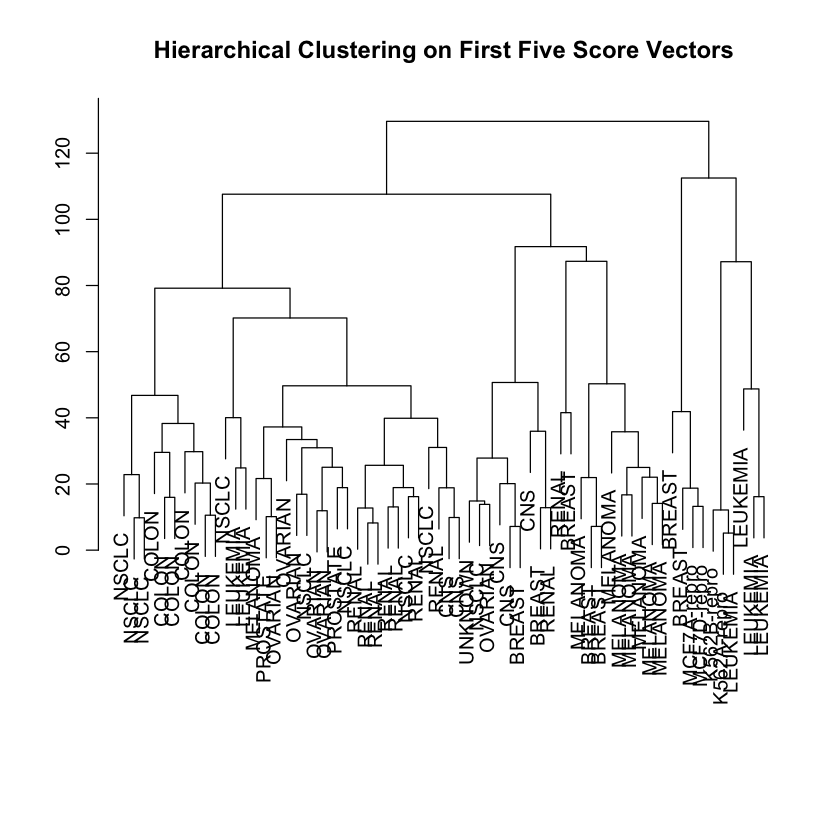

In [22]:
hc.out <- hclust(dist(pr.out$x[,1:5]))
plot(hc.out, labels=nci.labs, main='Hierarchical Clustering on First Five Score Vectors', xlab='', ylab='', sub='')

In [23]:
table(cutree(hc.out, 4), nci.labs)

   nci.labs
    BREAST CNS COLON K562A-repro K562B-repro LEUKEMIA MCF7A-repro MCF7D-repro
  1      0   2     7           0           0        2           0           0
  2      5   3     0           0           0        0           0           0
  3      0   0     0           1           1        4           0           0
  4      2   0     0           0           0        0           1           1
   nci.labs
    MELANOMA NSCLC OVARIAN PROSTATE RENAL UNKNOWN
  1        1     8       5        2     7       0
  2        7     1       1        0     2       1
  3        0     0       0        0     0       0
  4        0     0       0        0     0       0

Unsurprisingly, these results are different from the ones that we obtained when we performed hierarchical clustering on the full data set. Sometimes performing clustering on the first few principal component score vectors can give better results than performing clustering on the full data. In this situation, we might view the principal component step as one of 'de-noising' the data. We could also perform K-means clustering on the first few principal component score vectors rather than the full data set.